In [162]:
os.listdir('../Assign/')

['.vscode',
 'a.png',
 'b.png',
 'bottom',
 'bottom.png',
 'DataComm.xlsx',
 'left',
 'left.png',
 'lower',
 'lower.png',
 'model.joblib',
 'model.zip',
 'poster_local_alps.png',
 'red.png',
 'right',
 'right.png',
 'test.py',
 'testopenCV.py',
 'testpySerial.py',
 'top',
 'top.png',
 'train3.csv',
 'upper',
 'upper.png',
 'win.png']

In [161]:
import os

In [163]:
# Train 

# Train 

In [164]:
import pandas as pd
import numpy as np

In [199]:
df_train = pd.read_csv('../Assign/train4.csv')

In [200]:
df_train.head()

,Label,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p759,p760,p761,p762,p763,p764,p765,p766,p767,p768
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
2,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [201]:
# df_train

In [202]:
df_train.shape

(141, 769)

In [203]:
data_col = df_train[df_train.columns[1:]]

In [204]:
# data_col.head()

In [205]:
X = data_col
y = df_train['Label']

**Clean data**

In [206]:
X = X.replace({1: 0, 0:255})

In [207]:
# X.head()

In [208]:
# y.head()

# Generate Picture

In [209]:
import matplotlib.pyplot as plt

In [210]:
def display(v):
  tmp = v.reshape(32,24)
  plt.imshow(tmp, cmap='gray')
  plt.show()

In [211]:
# X.loc[2].values

In [212]:
# type(X.loc[2].values)

In [213]:
# display(X.loc[2].values)
# print(y.loc[2])

# Model

In [214]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=999)

In [216]:
X_train = X_train.reset_index().drop('index', axis=1)
X_test = X_test.reset_index().drop('index', axis=1)
y_train = y_train.reset_index().drop('index', axis=1)
y_test = y_test.reset_index().drop('index', axis=1)

In [217]:
model = RandomForestClassifier()

In [218]:
model.fit(X_train, y_train)

C:\Users\Puwadol Limwanichsin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Puwadol Limwanichsin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [219]:
predict = model.predict(X_test)

In [222]:
# X_test

In [220]:
accuracy_score(y_test, predict)

0.9361702127659575

In [221]:
# X_test.shape

In [223]:
X_train.shape

(94, 768)

# Test function

In [224]:
def test(model, X, y):
  X = X.reshape((1, -1))
  y_pred = model.predict_proba(X)
  pred = model.predict(X)
  display(X)
  print(y_pred)
  print('Prediction : ', pred)
  print('Type : ', y)

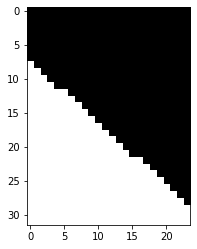

[[1. 0. 0. 0. 0. 0.]]
Prediction :  [0]
Type :  Label    0
Name: 10, dtype: int64


In [225]:
test(model, X_test.loc[10].values, y_test.loc[10])

In [226]:
# for i in range(0, 31):
#   test(model, X_test.loc[i].values, y_test.loc[i])

# Export Model

In [227]:
from sklearn.externals import joblib

In [228]:
filename = 'model.joblib'
joblib.dump(model, filename)

['model.joblib']

# Test Model

In [0]:
files.download('model.joblib')

In [0]:
!rm -rf test.sav

In [0]:
!ls

In [0]:
x = [1,2,3,4]

In [0]:
np.array(x).reshape((-1, 1))

array([[1],
       [2],
       [3],
       [4]])

In [0]:
type(X.loc[2].values)

numpy.ndarray

In [50]:
model_test = joblib.load('model.joblib')

In [51]:
predict = model_test.predict(X.loc[2].values.reshape(1, -1))

In [152]:
import cv2
import numpy as np
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
img = cv2.imread('D:/work/2D/Datacom/Assign/upper/209.bmp',0)
width = img.shape[1]
height = img.shape[0]
print(width,' ',height)
edgeW = width//10 - 1
edgeH = height//10 - 1
scaleH = (img.shape[0] - 2*edgeH)//3
scaleW = (img.shape[1] - 2*edgeW)//3
l=[]
# for j in range (0,width,width//3 - 1):
#     px = img[height//3 - 10,j]
#     if px < 25:
#         print('1',end = ' ')
#     else:
#         print("0",end = ' ')
# print()

# for i in range (0,height,10):
#     for j in range (0,width,10):
#         px = img[i,j]
#         if px < 25:
#             print('1',end = ' ')
#         else:
#             print("0",end = ' ')
#     print()
(thresh,bw)=cv2.threshold(img,25,255,cv2.THRESH_BINARY)
l=[]
print()
for i in range (0,height,10):
    for j in range (0,width,10):
        if bw[i,j] == 255:
            print('0',end = ' ')
            l.append(255)
        else:
            print("1",end = ' ')
            l.append(0)
    print()
    print(end= ' ')

240   320

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1

In [153]:
X_test1 = np.array(l).reshape(1, -1)

In [154]:
X_test1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [155]:
model = joblib.load('model.joblib')

In [156]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
predict = model.predict(X_test1)

In [158]:
predict

array([0], dtype=int64)

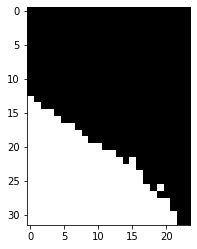

In [159]:
display(X_test1)

In [52]:
model_test

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)